# Homework 5

**Before you start:** Read Chapter on Naive Bayes and KNN in the textbook.

**Note:** Please enter the code along with your comments in the **TODO** section.

Alternative solutions are always welcomed.

# Part 1: K-Nearst-Neighbors

### Problem 2 ##

The objective is to classify the breast cancer data using K-NN classifier.

**TODO1**

Load the breast cancer data and rename the columns to the below fields in the same order

Id, C_thickness, Cell_Size, Cell_Shape, Adhesion, E_Cell_Size, Bare_Nuclei, B_Chromatin, N_Nucleoli, Mitoses, Class

In [1]:
# Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt

In [2]:
# Load the breast cancer data
url = "https://raw.githubusercontent.com/shreyapande1/HW5/main/breast-cancer-wisconsin.txt"
bcancer = pd.read_csv(url)

In [3]:
bcancer.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [4]:
# rename the columns to the below fields in the given order
bcancer = bcancer.rename(columns={'0': 'Id', '1': 'C_thickness', '2': 'Cell_Size' , '3': 'Cell_Shape', '4': 'Adhesion', '5': 'E_Cell_Size',
                                  '6': 'Bare_Nuclei', '7': 'B_Chromatin', '8': 'N_Nucleoli', '9': 'Mitoses', '10': 'Class'})

In [5]:
bcancer.head()

,Id,C_thickness,Cell_Size,Cell_Shape,Adhesion,E_Cell_Size,Bare_Nuclei,B_Chromatin,N_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


**TODO 2**

Plot the heatmap for the correlation coefficients with the target variable (Class)  and interpret your findings.


Drop redundant columns and view summary of the dataset.
Convert all the variables to numeric.


In [6]:
corr_mtx = bcancer.corr() # getting the correlation matrix

In [7]:
# Plot the heatmap for the correlation coefficients with the target variable (Class)
class_corr = corr_mtx['Class']

In [11]:
corr_mtx

,Id,C_thickness,Cell_Size,Cell_Shape,Adhesion,E_Cell_Size,B_Chromatin,N_Nucleoli,Mitoses,Class
Id,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
C_thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
Cell_Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
Cell_Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
E_Cell_Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
B_Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
N_Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
Class,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


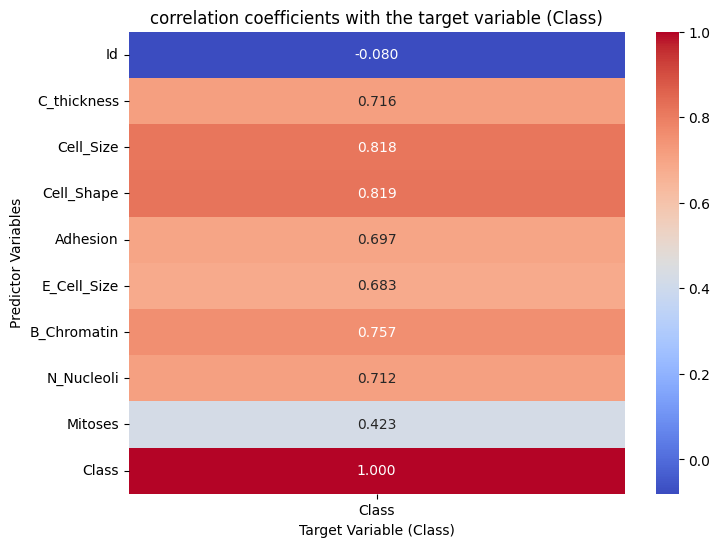

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(class_corr.to_frame(), cmap="coolwarm", annot=True, fmt=".3f")
plt.title('correlation coefficients with the target variable (Class)')
plt.ylabel('Predictor Variables')
plt.xlabel('Target Variable (Class)')
plt.show()

In [10]:
drop_cols = ['Id']
bcancer = bcancer.drop(drop_cols, axis=1) #dropping redundant cols

In [12]:
bcancer = bcancer.apply(pd.to_numeric, errors='coerce')

In [13]:
bcancer.info() #numeric conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   C_thickness  699 non-null    int64  
 1   Cell_Size    699 non-null    int64  
 2   Cell_Shape   699 non-null    int64  
 3   Adhesion     699 non-null    int64  
 4   E_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei  683 non-null    float64
 6   B_Chromatin  699 non-null    int64  
 7   N_Nucleoli   699 non-null    int64  
 8   Mitoses      699 non-null    int64  
 9   Class        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


**TODO 3**



Considering the fundamental idea of k-NN, would you recommend data rescaling before model building? Why? 

If so, partition the data into 75% training and 25% validation set.

Impute the missing values with the mean values of training data.
Check if all the nulls are removed in both train and test dataset.

Standardize the data.

**Note:**   When you standardize the validation set, you need to use the training set's mean and variance. 


Group 17's soft recommendation would be to rescale the data before building a k-NN model. As the k-NN algorithm relies on calculating distances between data points to identify the nearest neighbors, the distance metric used might influence the performance. If the features are not on the same scale, then the distance calculation may be biased towards certain other features. Hence we believe, rescaling the data before building a k-NN model can improve its performance and make the results more reliable

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [16]:
X = bcancer.drop('Class', axis=1)
y = bcancer['Class']

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
# check for null vals
bcancer.isnull().sum()

C_thickness     0
Cell_Size       0
Cell_Shape      0
Adhesion        0
E_Cell_Size     0
Bare_Nuclei    16
B_Chromatin     0
N_Nucleoli      0
Mitoses         0
Class           0
dtype: int64

In [19]:
# let's remove null values by mean values of training data

In [52]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)

In [53]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

**TODO 4**

Choose the best k from 1-10 based on the classification accuracy of different k values on the validation set.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [41]:
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
val_acc_dict = {}

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a range of k values to try
k_values = range(1, 11)

# Train and evaluate k-NN models with different k values
best_k = None
best_accuracy = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print("k = {}, accuracy = {:.2f}".format(k, accuracy))
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print("Best k: {}, accuracy = {:.2f}".format(best_k, best_accuracy))

k = 1, accuracy = 0.95
k = 2, accuracy = 0.93
k = 3, accuracy = 0.98
k = 4, accuracy = 0.94
k = 5, accuracy = 0.96
k = 6, accuracy = 0.95
k = 7, accuracy = 0.97
k = 8, accuracy = 0.97
k = 9, accuracy = 0.97
k = 10, accuracy = 0.97
Best k: 3, accuracy = 0.98


**TODO 5**

For the chosen k, display the confusion matrix and evaluate the performance of the model using recall and precision.

Check for overfitting and underfitting for the k chosen.

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

In [58]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Train a k-NN model with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_val, y_pred)
print("Confusion matrix:")
print(conf_mat)

precision = precision_score(y_val, y_pred, pos_label=4)
recall = recall_score(y_val, y_pred, pos_label=4)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

Confusion matrix:
[[116   2]
 [  2  55]]
Precision: 0.96
Recall: 0.96


**TODO 6**

Classify the new record given below using the chosen k. 

1002945, 5, 4, 4, 5, 7, 10, 3, 2, 1

Considering the size of the dataset, would you recommend data partition before scoring the new record? Why?

In [60]:
new_record = np.array([1002945,5, 4, 4, 5, 7, 10, 3, 2])

# Standardize the new record using the mean and standard deviation of the training data
new_record = (new_record - X_train.mean(axis=0)) / X_train.std(axis=0)

In [61]:
new_record_pred = knn.predict([new_record])

print("Predicted class label: {}".format(new_record_pred[0]))

Predicted class label: 4


### Problem 3 ##

The data concerns city-cycle fuel consumption in miles per gallon (mpg). The objective is to use k-NN regression to predict the mpg with the given attributes.

In [147]:
# import the dataset "auto_mpg.csv"
url1 = "https://raw.githubusercontent.com/shreyapande1/HW5/main/auto_mpg.csv"
autodf = pd.read_csv(url1)

In [148]:
autodf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [149]:
autodf.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [150]:
autodf['horsepower'] = pd.to_numeric(autodf['horsepower'], errors='coerce')
autodf['horsepower'].fillna(autodf['horsepower'].mean(), inplace=True)

**TODO 1**

Check the unique value of the variable "car name". 

Would you recommend keeping "car name" for prediction? Why? 

If not, eliminate the variable "car name".

In [151]:
# unique value of the variable "car name"
autodf['car name'].nunique()

301

The variable "car name" contains unique values for each car in the dataset. Hence, using "car name" for prediction might not be the best approach since it contains text data that cannot be directly used in our algorithm.
Furthermore, Group 17 feels that, using "car name" for prediction could also lead to overfitting, as the model may associate specific car names with outcomes instead of underlying patterns.Therefore, for this problem, we will be dropping the variable "Car name"

In [130]:
autodf.drop('car name', axis=1, inplace=True)

**TODO 2**

Convert the variable "origin" to dummy variables before modeling

In [131]:
autodf = pd.get_dummies(autodf, columns=['origin'], prefix='origin')

**TODO 3**

Partition the data into 75% training and 25% validation set.

In [132]:
X = autodf.drop('mpg', axis=1)
y = autodf['mpg']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

**TODO 4**

Rescale the numeric data. Note that dummy variables should not be rescaled.

**Note:** When you standardize the validation set, you need to use the training set's mean and variance.

In [133]:
autodf.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin_1        0
origin_2        0
origin_3        0
dtype: int64

In [134]:
scaler = StandardScaler()
numeric_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])

**TODO 5**

Choose the best k from 1-10 based on the MSE of different k values on the validation set. Explain the reason for your choice.

In [158]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [183]:
mse_dict = {}
for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mse_dict[k] = mse

In [189]:
print("-----Chart for K & their resp MSE vals-----")
for k, mse in mse_dict.items():
    print(f"k={k}: MSE={mse:.2f}")
best_k = min(mse_dict, key=mse_dict.get)
print(f"\nBest k val: {best_k}")

-----Chart for K & their resp MSE vals-----
k=1: MSE=15.47
k=2: MSE=12.44
k=3: MSE=11.25
k=4: MSE=11.39
k=5: MSE=12.58
k=6: MSE=12.49
k=7: MSE=13.01
k=8: MSE=12.81
k=9: MSE=12.79
k=10: MSE=13.17

Best k val: 3


Choice of K depends on various parameters, in this dataset however, Group 17s recommendation would be K = 3, as it has the lowest MSE value of 11.25 on the validation set

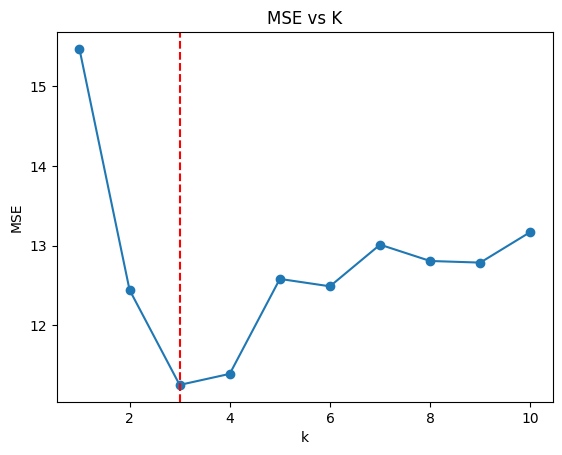

In [191]:
import matplotlib.pyplot as plt
plt.plot(list(mse_dict.keys()), list(mse_dict.values()), '-o')
plt.title("MSE vs K")
plt.xlabel("k")
plt.ylabel("MSE")
plt.axvline(x=best_k, color='r', linestyle='--')
plt.show()

**TODO 6**


Score the validation set with the best k. Comment on the model performance.

In [193]:
# Score the validation set with the best k
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f"MSE on validation set with k={best_k}: {mse:.2f}")

MSE on validation set with k=3: 11.25


We feel that, based on the MSE value of 11.25 on the validation set with k=3, the model performance can be considered reasonably good. 

Our values mean that the predicted output is, on average, is 11.25 units away from the actual output.

Overall, the model could be considered useful tool for predicting the fuel efficiency (mpg) of automobiles.

# Naive Bayes

### **Problem 4**##

In this problem, we need to build a Naive Bayes model to classify whether a movie review is positive or negative. 

The given data is a subset of [the IMDB movie review dataset](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews).

This might be your first time working with text mining. Therefore, the basic pre-processing steps are given below. 

**You have two major tasks:**

* Go through the code and get to know the purpose of each preprocessing step. Summarize what a preprocessing step does when required.
* Build a multinomial Naive Bayes model to classify the reviews.

In [140]:
# # Please remove # and run the following code if you have an error while importing the dataset
!pip install --upgrade openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 KB 5.5 MB/s eta 0:00:00
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.10
    Uninstalling openpyxl-3.0.10:
      Successfully uninstalled openpyxl-3.0.10


In [141]:
# Import the dataset
import pandas as pd
url2 = "https://raw.githubusercontent.com/shreyapande1/HW5/main/IMDB%20Dataset_subset.csv"
imdb = pd.read_csv(url2)

In [142]:
# Packages required for preprocessing #
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer #for lemmatization
import re #regular expression package
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [143]:
X = [row for row in imdb['review']] #list of reviews
classes = imdb['sentiment'] #list of true classes

In [144]:
# Pre-process the data
reviews = []
lemmatizer = WordNetLemmatizer() 

for review in range(0, len(X)):
    # part 1
    review = re.sub(r'[\W_]', ' ', str(X[review])) 
    review = re.sub(r'\s+[a-zA-Z]\s+', ' ', review) 
    review = re.sub(r'\^[a-zA-Z]\s+', ' ', review) 
    review = re.sub(r'\s+', ' ', review, flags=re.I) 
    review = re.sub(r'^b\s+', '', review) # if a review record is in bytes, the corresponding line will have a letter 'b' appended at the start)
    review = review.lower()
    review = re.sub(r'[0-9]+', '', review) 

    # part 2
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review]
    review = ' '.join(review)

    reviews.append(review)


**TODO 1**

Explain the function that part 1 and part 2 achieve in the loop.



> We observed two distinct stages of text preprocessing in "Part 1" & "Part 2"

**Part 1:**
It focuses on cleaning and normalizing the raw text data to make it more consistent and remove the irrelevant information.

Replacing the non-word characters with spaces.

*   Remove single word characters.
*   Remove the strings starting with a single character.
*   Remove the extra spaces.
*   Remove any leading 'b' character if the review is in bytes.
*   Convert the characters into lowercase.
*   Removal of numbers.

Group 17 feels that the goal of the above steps might be to standardize the text data and remove any noise.


**Part 2:**
It focuses on lemmatizing the resulting tokens from Part 1 to further reducing the noise.

*   Splits the preprocessed review into individual tokens
*   Lemmatizes each token
*   Rejoins the tokens into a single string

The goal of "Part 2" is to reduce each token to its base form, removing any variations, and standardizing it.

Overall, the above parts 1 & 2 help to prepare the text data for use in machine learning models.

In [145]:
# Continue with pre-processing
vectorizer = CountVectorizer(stop_words = "english", max_df=0.7, min_df=5) 
texts = vectorizer.fit_transform(reviews).toarray()  
vocab = vectorizer.vocabulary_ 
vocab = sorted(vocab.items(), key = lambda x: x[1])
vocab = [v[0] for v in vocab]


**TODO 2**

What do "texts" and "vocab" represent? What is the relationship between them?

**Texts:**
It is a matrix where each row corresponds to a preprocessed review and each column corresponds to a word in the vocab. The value in each cell represents the frequency of the corresponding word in the it's review. 

**Vocab:**
It is a list of the words in the vocabulary used to create texts. The words in vocab are sorted in alphabetical order and are assigned an index that corresponds to the column in texts.

In short, *texts* and *vocab* are both representations of the preprocessed text data.

**TODO 3**

Partition the data into 80% training and 20% validation set.

In [195]:
X_train, X_val, y_train, y_val = train_test_split(texts, classes, test_size=0.2, random_state=42)

**TODO 4**

Build a multinomial Naive Bayes model on the training set.

In [196]:
from sklearn.naive_bayes import MultinomialNB

In [197]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

**Hint:** [Multinomial Naive Bayes with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

**TODO 5**

Evaluate the model performance with the training and validation set. Comment on the model performance.

In [198]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_train_pred = nb.predict(X_train)
y_val_pred = nb.predict(X_val)

In [205]:
# a lot of printing of vals
print("\nTraining Set Performance Metrics:\n")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred, pos_label='positive'))
print("Recall:", recall_score(y_train, y_train_pred, pos_label='positive'))
print("F1-Score:", f1_score(y_train, y_train_pred, pos_label='positive'))
print("-----------------------------------")
print("Validation Set Performance Metrics:\n")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred, pos_label='positive'))
print("Recall:", recall_score(y_val, y_val_pred, pos_label='positive'))
print("F1-Score:", f1_score(y_val, y_val_pred, pos_label='positive'))


Training Set Performance Metrics:

Accuracy: 0.92875
Precision: 0.9426877470355731
Recall: 0.9103053435114504
F1-Score: 0.9262135922330098
-----------------------------------
Validation Set Performance Metrics:

Accuracy: 0.83
Precision: 0.830423940149626
Recall: 0.830423940149626
F1-Score: 0.830423940149626


Based on the metrics observed, we feel that it seems that the model has good performance on the training set with an accuracy of 0.92. This means that the model is able to make accurate predictions.

However, the model seems to have lower performance on the validation set with an accuracy of 0.83. 

Hence, we feel that the model may be overfitting to the training data, and not generalizing well to new data.

**Hint:** [Classification report with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

**If you are interested (this part is not graded):**

Explore one or two records that were misclassified. Check the original text, vectorized text, and comment on the possible reason why the record got misclassified.